In [6]:
# pip install wordcloud

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [7]:
filmes = pd.read_csv("../../../dados/imdb-reviews-pt-br.csv")

In [8]:
filmes["text_minus"] = filmes["text_pt"].str.lower()

In [9]:
filmes["text_no_enter"] = filmes["text_minus"].replace(["\n", "\r", "\t"], [' ', ' ', ' '])

In [10]:
import string
mytrans = str.maketrans("", "", string.punctuation)
filmes["text_no_punct"] = filmes["text_no_enter"].str.translate(mytrans)

In [11]:
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stop_words( texto ): 
    global stop_words
    lista_palavras = texto.split(" ")
    nova_lista = []
    for palavra in lista_palavras:
        if palavra not in stop_words:
            nova_lista.append(palavra)
    return " ".join(nova_lista)

In [13]:
filmes["texto_no_stopwords"] = filmes["text_no_punct"].apply(remove_stop_words)

In [15]:
# texto = filmes["texto_no_stopwords"].iloc[0]

In [19]:
texto = ' '.join(filmes["texto_no_stopwords"])

In [20]:
wordcloud = WordCloud().generate(texto)

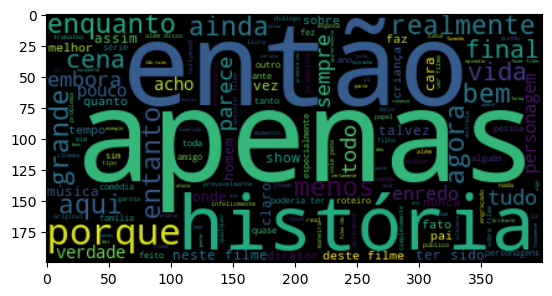

In [21]:
plt.imshow(wordcloud, interpolation="bilinear")

In [ ]:
palavras_adicionais = ['então', 'apenas', 'história', 'enquanto', 'ainda', 'agora', 'porque']